# DBSCAN

- 노이즈가있는 애플리케이션의 밀도 기반 공간 클러스터링   

- 고밀도의 핵심 샘플을 찾아서 클러스터를 확장합니다. 밀도가 비슷한 클러스터를 포함하는 데이터에 적합합니다.  

### Toy Data 생성
- outlier가 있는 data points를 생성하고 DBSCAN 알고리즘이 outlier를 실제로 검출하는지 test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X1, _ = make_blobs(n_samples=500, centers=[[-3,-3]], random_state=0)
X2, _ = make_blobs(n_samples=500, centers=[[3,3]], random_state=0)
X3 = np.random.rand(500, 2) * 3 + 4

X4 = np.random.randn(10, 2) * 3  # outlier 추가

X1.shape, X2.shape, X3.shape, X4.shape

((500, 2), (500, 2), (500, 2), (10, 2))

- 데이터 시각화

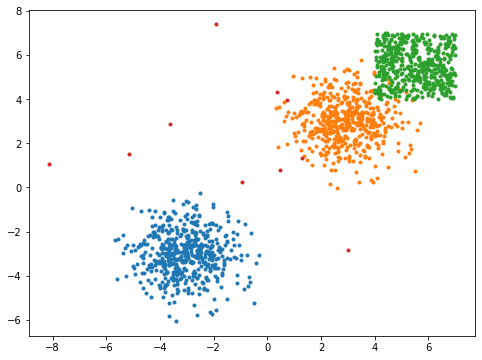

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.scatter(X2[:, 0], X2[:, 1], marker='.')
plt.scatter(X3[:, 0], X3[:, 1], marker='.')
plt.scatter(X4[:, 0], X4[:, 1], marker='.')

- 하나의 dataset으로 통합

In [4]:
X = np.vstack([X1, X2, X3, X4])
X.shape

(1510, 2)

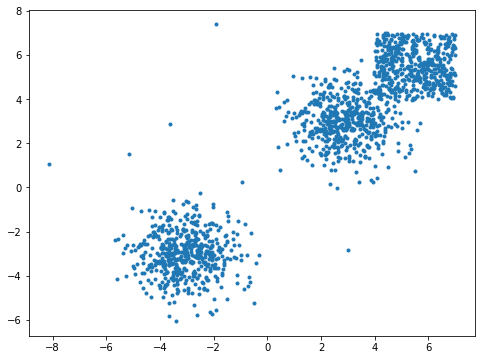

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], marker='.')

### DBSCAN model 학습  
```
DBSCAN(eps=epsilon, min_samples=minimumSamples)
```
- eps : 이웃으로 간주될 최대 거리 (Radius). 가장 중요한 DBSCAN 매개 변수.
- min_samples : 코어 포인트로 간주될 포인트에 대한 이웃의 minimum 샘플 수(포인트 자체 포함)
    
- core_sample_indices : core sample 의 index  
- labels_ : 데이터 세트의 각 point에 대한 클러스터 레이블. outlier 에는 -1 이 지정.

In [6]:
epsilon = 0.3
minimumSamples = 7

db = DBSCAN(eps=epsilon, min_samples=minimumSamples)
db.fit(X)

labels = db.labels_

print("각 data point 의 label : ")
print(labels.shape, labels)
print()
print("core sample들의 index : ")
print(db.core_sample_indices_.shape, db.core_sample_indices_)

각 data point 의 label : 
(1510,) [ 0  0  0 ... -1 -1 -1]

core sample들의 index : 
(1232,) [   1    2    3 ... 1497 1498 1499]


In [7]:
unique_labels = set(labels)       # -1 : outlier
unique_labels

{-1, 0, 1}

- outlier 시각화

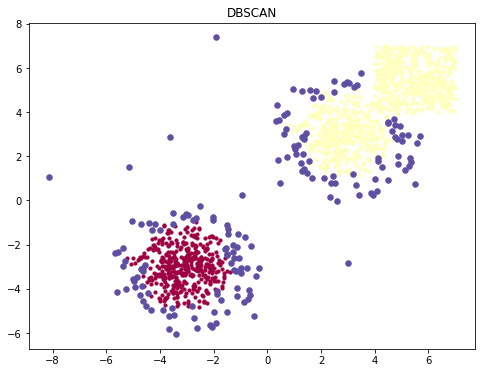

In [8]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    members = (labels == k)
    if k == -1:
        size = 30
    else:
        size = 10
    plt.scatter(X[members, 0], X[members, 1], color=col, marker='o', s=size)

plt.title('DBSCAN')
plt.show()